In [2]:
import pandas as pd

# ============================
# 1. CSV の読み込み
# ============================
# 日本語データの多くは Shift-JIS / CP932 なのでまず cp932 で読む
df = pd.read_csv("games.csv", encoding="cp932")

# ============================
# 2. 勝敗判定用の列を作る
# ============================
df["winner"] = None
df["loser"] = None

# 引き分け判定
df["is_draw"] = df["home_team_score"] == df["away_team_score"]

# ホーム勝利
home_win = df["home_team_score"] > df["away_team_score"]
df.loc[home_win, "winner"] = df.loc[home_win, "home_team_id"]
df.loc[home_win, "loser"]  = df.loc[home_win, "away_team_id"]

# アウェイ勝利
away_win = df["home_team_score"] < df["away_team_score"]
df.loc[away_win, "winner"] = df.loc[away_win, "away_team_id"]
df.loc[away_win, "loser"]  = df.loc[away_win, "home_team_id"]

# ============================
# 3. チームごとの勝敗数を集計
# ============================

# 勝利数
wins = (
    df.dropna(subset=["winner"])
      .groupby(["year_id", "winner"])
      .size()
      .reset_index(name="wins")
      .rename(columns={"winner": "team_id"})
)

# 敗北数
losses = (
    df.dropna(subset=["loser"])
      .groupby(["year_id", "loser"])
      .size()
      .reset_index(name="losses")
      .rename(columns={"loser": "team_id"})
)

# 引き分け数（ホーム側）
draws_home = (
    df[df["is_draw"]]
      .groupby(["year_id", "home_team_id"])
      .size()
      .reset_index(name="draws")
      .rename(columns={"home_team_id": "team_id"})
)

# 引き分け数（アウェイ側）
draws_away = (
    df[df["is_draw"]]
      .groupby(["year_id", "away_team_id"])
      .size()
      .reset_index(name="draws")
      .rename(columns={"away_team_id": "team_id"})
)

# 引き分けを合算
draws = pd.concat([draws_home, draws_away], ignore_index=True)
draws = draws.groupby(["year_id", "team_id"])["draws"].sum().reset_index()

# ============================
# 4. 勝敗表を結合して勝率計算
# ============================

standings = (
    wins.merge(losses, on=["year_id", "team_id"], how="outer")
        .merge(draws, on=["year_id", "team_id"], how="outer")
)

# NaN → 0 に変換
standings = standings.fillna(0)

# 総試合数
standings["total_games"] = standings["wins"] + standings["losses"] + standings["draws"]

# 勝率（引き分けを勝ち0.5扱いにする場合は式を変更する）
standings["win_pct"] = standings["wins"] / (standings["wins"] + standings["losses"])

# ソート（勝率順）
standings = standings.sort_values(["year_id", "win_pct"], ascending=[True, False])

# ============================
# 5. 結果表示
# ============================
print(standings)

    year_id  team_id  wins  losses  draws  total_games   win_pct
1     30018        2    79      54     19          152  0.593985
4     30018        5    77      58     10          145  0.570370
9     30018       11    74      59     19          152  0.556391
8     30018        9    68      59     21          148  0.535433
11    30018      376    66      63     16          145  0.511628
0     30018        1    63      64     21          148  0.496063
10    30018       12    60      62     21          143  0.491803
5     30018        6    63      68     12          143  0.480916
7     30018        8    55      68     20          143  0.447154
6     30018        7    55      70     18          143  0.440000
3     30018        4    55      71     17          143  0.436508
2     30018        3    54      73     16          143  0.425197
13    30019        2    85      63      5          153  0.574324
21    30019       11    83      68      3          154  0.549669
22    30019       12    7

In [5]:
import pandas as pd

# ============================
# 1. CSV の読み込み
# ============================
# 日本語データの多くは Shift-JIS / CP932 なのでまず cp932 で読む
df = pd.read_csv("games.csv", encoding="cp932")

# ============================
# 2. 勝敗判定用の列を作る
# ============================
df["winner"] = None
df["loser"] = None

# 引き分け判定
df["is_draw"] = df["home_team_score"] == df["away_team_score"]

# ホーム勝利
home_win = df["home_team_score"] > df["away_team_score"]
df.loc[home_win, "winner"] = df.loc[home_win, "home_team_id"]
df.loc[home_win, "loser"]  = df.loc[home_win, "away_team_id"]

# アウェイ勝利
away_win = df["home_team_score"] < df["away_team_score"]
df.loc[away_win, "winner"] = df.loc[away_win, "away_team_id"]
df.loc[away_win, "loser"]  = df.loc[away_win, "home_team_id"]

# ============================
# 3. チームごとの勝敗数を集計
# ============================

# 勝利数
wins = (
    df.dropna(subset=["winner"])
      .groupby(["game_year", "winner"])
      .size()
      .reset_index(name="wins")
      .rename(columns={"winner": "team_id"})
)

# 敗北数
losses = (
    df.dropna(subset=["loser"])
      .groupby(["game_year", "loser"])
      .size()
      .reset_index(name="losses")
      .rename(columns={"loser": "team_id"})
)

# 引き分け数（ホーム側）
draws_home = (
    df[df["is_draw"]]
      .groupby(["game_year", "home_team_id"])
      .size()
      .reset_index(name="draws")
      .rename(columns={"home_team_id": "team_id"})
)

# 引き分け数（アウェイ側）
draws_away = (
    df[df["is_draw"]]
      .groupby(["game_year", "away_team_id"])
      .size()
      .reset_index(name="draws")
      .rename(columns={"away_team_id": "team_id"})
)

# 引き分けを合算
draws = pd.concat([draws_home, draws_away], ignore_index=True)
draws = draws.groupby(["game_year", "team_id"])["draws"].sum().reset_index()

# ============================
# 4. 勝敗表を結合して勝率計算
# ============================

standings = (
    wins.merge(losses, on=["game_year", "team_id"], how="outer")
        .merge(draws, on=["game_year", "team_id"], how="outer")
)

# NaN → 0 に変換
standings = standings.fillna(0)

# 総試合数
standings["total_games"] = standings["wins"] + standings["losses"] + standings["draws"]

# 勝率（引き分けを勝ち0.5扱いにする場合は式を変更する）
standings["win_pct"] = standings["wins"] / (standings["wins"] + standings["losses"])

# ソート（勝率順）
standings = standings.sort_values(["game_year", "win_pct"], ascending=[True, False])

# ============================
# team_id → team_name の対応表を作る
# ============================

team_master_home = df[["home_team_id", "home_team_name"]] \
    .rename(columns={"home_team_id": "team_id", "home_team_name": "team_name"})

team_master_away = df[["away_team_id", "away_team_name"]] \
    .rename(columns={"away_team_id": "team_id", "away_team_name": "team_name"})

team_master = pd.concat([team_master_home, team_master_away]).drop_duplicates()

standings = standings.merge(team_master, on="team_id", how="left")

standings = standings[[
    "game_year", "team_id", "team_name",
    "wins", "losses", "draws", "total_games", "win_pct"
]]


# ============================
# 5. 結果表示
# ============================
print(standings)

# csvに保存
standings.to_csv("win_pct.csv", index=False, encoding="utf-8-sig")

    game_year  team_id team_name  wins  losses  draws  total_games   win_pct
0        2021        2      ヤクルト    79      54     19          152  0.593985
1        2021        5        阪神    77      58     10          145  0.570370
2        2021       11     オリックス    74      59     19          152  0.556391
3        2021        9       ロッテ    68      59     21          148  0.535433
4        2021      376        楽天    66      63     16          145  0.511628
5        2021        1        巨人    63      64     21          148  0.496063
6        2021       12    ソフトバンク    60      62     21          143  0.491803
7        2021        6        広島    63      68     12          143  0.480916
8        2021        8      日本ハム    55      68     20          143  0.447154
9        2021        7        西武    55      70     18          143  0.440000
10       2021        4        中日    55      71     17          143  0.436508
11       2021        3      DeNA    54      73     16          143  0.425197

データを読み込んでいます...
  games.csv: shift-jisで読み込み成功
  stats_pit.csv: shift-jisで読み込み成功
  stats_bat.csv: cp932で読み込み成功
試合データ: 4382試合
投手データ: 1749選手
打撃データ: 3522選手

=== チーム別勝敗を集計 ===
=== チーム別与四球率を計算 ===
=== チーム別得四球率を計算 ===
=== 統合データを作成 ===

=== 相関分析 ===
与四球率と勝率の相関係数: 0.035
得四球率と勝率の相関係数: 0.391

→ 相関は弱い
→ 正の相関：四球を選ぶチームほど強い傾向

=== チーム別詳細データ ===
      チーム名  勝率(%)    勝    敗  与四球率  得四球率(%)  与四球数     投球回
1       阪神   54.1  402  312  0.00      8.0     0     0.0
2   ソフトバンク   53.9  401  310  0.00      8.2     0     0.0
3    オリックス   51.6  386  330  0.00      7.2     0     0.0
4       巨人   48.2  351  340  0.00      7.6     0     0.0
5     DeNA   48.2  356  353  2.85      6.8  2017  6375.0
6       楽天   47.3  339  351  0.00      8.8     0     0.0
7     日本ハム   46.5  339  355  0.00      7.4     0     0.0
8     ヤクルト   46.3  340  356  0.00      8.3     0     0.0
9      ロッテ   46.3  338  356  0.00      8.1     0     0.0
10      広島   46.1  332  359  0.00      6.4     0     0.0
11      西武   42.4  304  385  0.00      7.

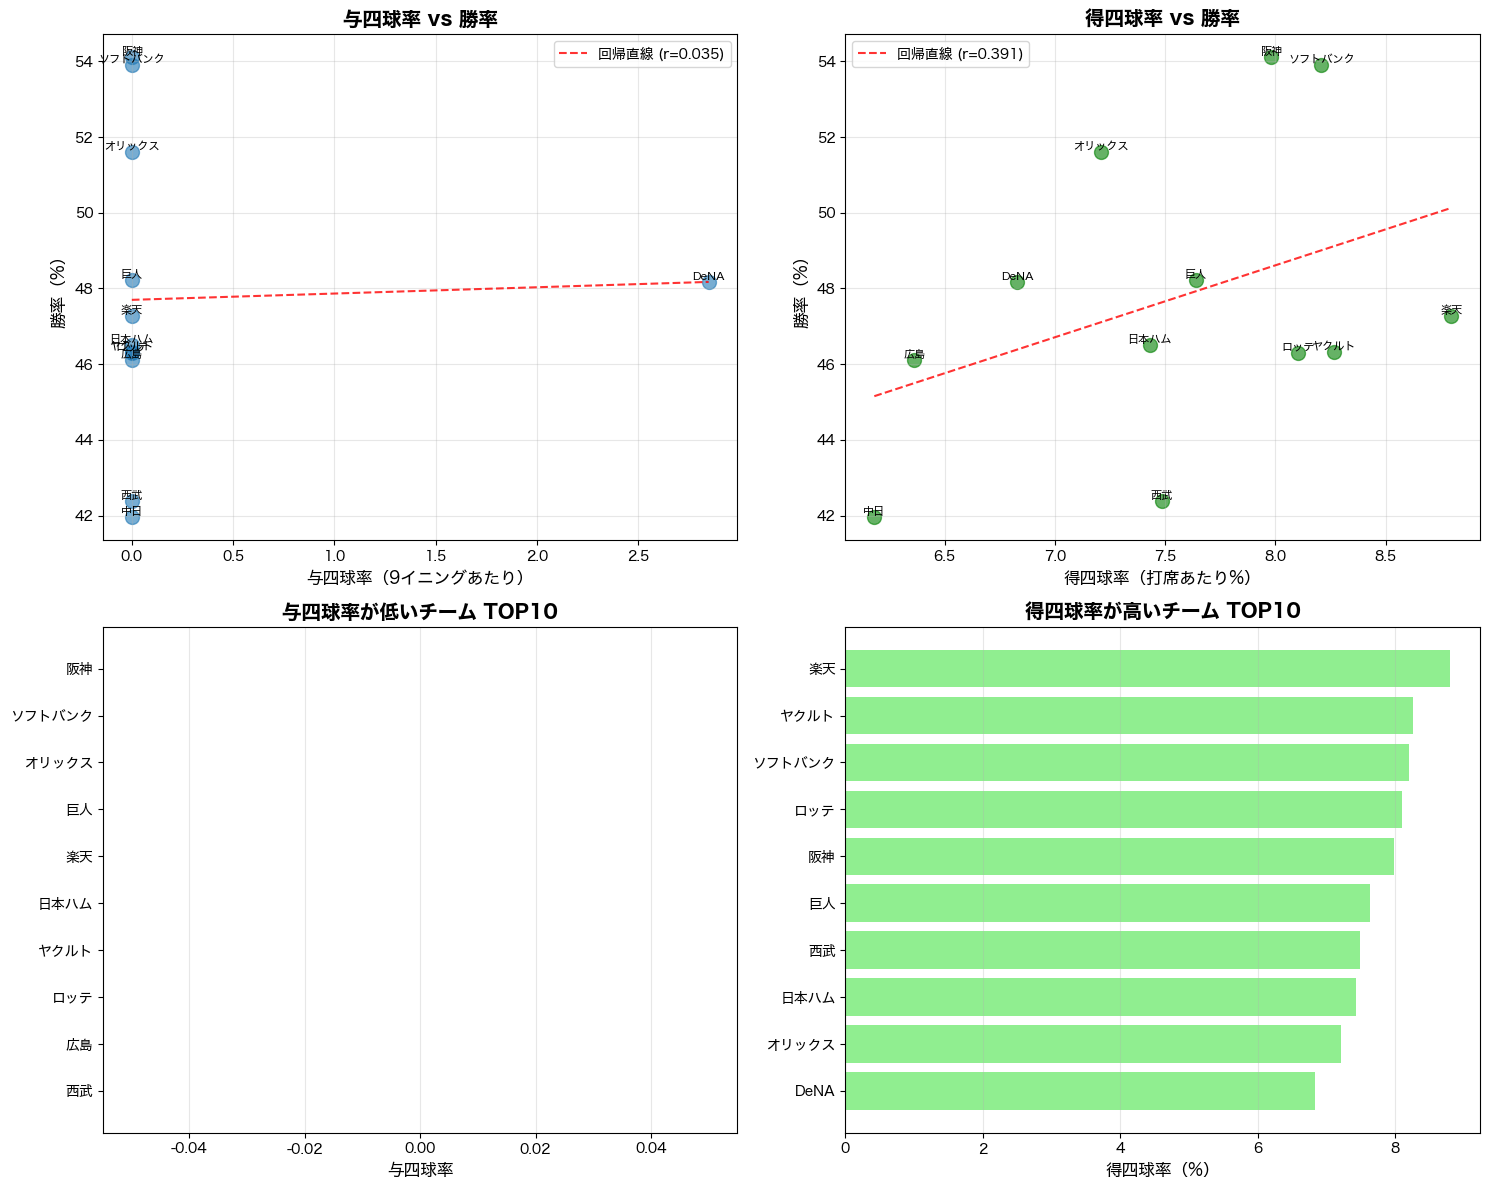


分析結果を 'team_analysis_result.csv' として保存しました

分析完了！


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォント設定（環境に応じて調整）
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（エンコーディング自動判定）
print("データを読み込んでいます...")

def read_csv_auto_encoding(filename):
    """エンコーディングを自動判定してCSVを読み込む"""
    encodings = ['utf-8', 'shift-jis', 'cp932', 'utf-8-sig']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f"  {filename}: {encoding}で読み込み成功")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"  {filename}: エラー ({encoding}): {e}")
            continue
    
    raise ValueError(f"{filename}の読み込みに失敗しました")

games = read_csv_auto_encoding('games.csv')
stats_pit = read_csv_auto_encoding('stats_pit.csv')
stats_bat = read_csv_auto_encoding('stats_bat.csv')  # 任意：得四球率分析用

print(f"試合データ: {len(games)}試合")
print(f"投手データ: {len(stats_pit)}選手")
print(f"打撃データ: {len(stats_bat)}選手\n")

# 1. チーム別勝敗を集計
print("=== チーム別勝敗を集計 ===")
team_records = {}

for _, game in games.iterrows():
    home_team = game['home_team_name']
    away_team = game['away_team_name']
    home_score = game['home_team_score']
    away_score = game['away_team_score']
    
    # 初期化
    if home_team not in team_records:
        team_records[home_team] = {'wins': 0, 'losses': 0, 'games': 0}
    if away_team not in team_records:
        team_records[away_team] = {'wins': 0, 'losses': 0, 'games': 0}
    
    # 勝敗集計
    if home_score > away_score:
        team_records[home_team]['wins'] += 1
        team_records[away_team]['losses'] += 1
    elif away_score > home_score:
        team_records[away_team]['wins'] += 1
        team_records[home_team]['losses'] += 1
    
    team_records[home_team]['games'] += 1
    team_records[away_team]['games'] += 1

# 2. チーム別投手成績を集計（与四球率）
print("=== チーム別与四球率を計算 ===")
team_pitching = stats_pit.groupby('team_name').agg({
    'bb': 'sum',
    'ip': 'sum',
    'ip_frac': 'sum'
}).reset_index()

# 与四球率の計算: bb * 9 / (ip + ip_frac / 3)
team_pitching['total_ip'] = team_pitching['ip'] + team_pitching['ip_frac'] / 3
team_pitching['bb_rate'] = team_pitching['bb'] * 9 / team_pitching['total_ip']

# 3. チーム別打撃成績を集計（得四球率）
print("=== チーム別得四球率を計算 ===")
team_batting = stats_bat.groupby('team_name').agg({
    'bb': 'sum',
    'pa': 'sum'
}).reset_index()

# 得四球率の計算: bb / pa * 100
team_batting['bb_obp'] = team_batting['bb'] / team_batting['pa'] * 100

# 4. 統合データフレーム作成
print("=== 統合データを作成 ===")
analysis_data = []

for team, record in team_records.items():
    win_rate = (record['wins'] / record['games'] * 100) if record['games'] > 0 else 0
    
    # 投手成績
    pit_stats = team_pitching[team_pitching['team_name'] == team]
    bb_rate = pit_stats['bb_rate'].values[0] if len(pit_stats) > 0 else 0
    bb_count = pit_stats['bb'].values[0] if len(pit_stats) > 0 else 0
    total_ip = pit_stats['total_ip'].values[0] if len(pit_stats) > 0 else 0
    
    # 打撃成績
    bat_stats = team_batting[team_batting['team_name'] == team]
    bb_obp = bat_stats['bb_obp'].values[0] if len(bat_stats) > 0 else 0
    
    analysis_data.append({
        'team': team,
        'wins': record['wins'],
        'losses': record['losses'],
        'games': record['games'],
        'win_rate': win_rate,
        'bb_rate': bb_rate,
        'bb_obp': bb_obp,
        'bb_count': bb_count,
        'total_ip': total_ip
    })

df_analysis = pd.DataFrame(analysis_data).sort_values('win_rate', ascending=False)

# 5. 相関分析
print("\n=== 相関分析 ===")
correlation_bb = df_analysis['bb_rate'].corr(df_analysis['win_rate'])
correlation_obp = df_analysis['bb_obp'].corr(df_analysis['win_rate'])

print(f"与四球率と勝率の相関係数: {correlation_bb:.3f}")
print(f"得四球率と勝率の相関係数: {correlation_obp:.3f}\n")

if correlation_bb < -0.3:
    print("→ 負の相関：四球を与えないチームほど強い傾向")
elif correlation_bb > 0.3:
    print("→ 正の相関：四球を与えるチームほど強い傾向")
else:
    print("→ 相関は弱い")

if correlation_obp > 0.3:
    print("→ 正の相関：四球を選ぶチームほど強い傾向")
elif correlation_obp < -0.3:
    print("→ 負の相関")
else:
    print("→ 相関は弱い")

# 6. 結果表示
print("\n=== チーム別詳細データ ===")
display_df = df_analysis[['team', 'win_rate', 'wins', 'losses', 'bb_rate', 'bb_obp', 'bb_count', 'total_ip']].copy()
display_df.columns = ['チーム名', '勝率(%)', '勝', '敗', '与四球率', '得四球率(%)', '与四球数', '投球回']
display_df['勝率(%)'] = display_df['勝率(%)'].round(1)
display_df['与四球率'] = display_df['与四球率'].round(2)
display_df['得四球率(%)'] = display_df['得四球率(%)'].round(1)
display_df['投球回'] = display_df['投球回'].round(1)
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string())

# 7. 可視化
print("\n=== グラフを作成中 ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# グラフ1: 与四球率 vs 勝率（散布図）
ax1 = axes[0, 0]
ax1.scatter(df_analysis['bb_rate'], df_analysis['win_rate'], alpha=0.6, s=100)
for _, row in df_analysis.iterrows():
    ax1.annotate(row['team'], (row['bb_rate'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z = np.polyfit(df_analysis['bb_rate'], df_analysis['win_rate'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['bb_rate'].min(), df_analysis['bb_rate'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_bb:.3f})')

ax1.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax1.set_ylabel('勝率（%）', fontsize=12)
ax1.set_title('与四球率 vs 勝率', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# グラフ2: 得四球率 vs 勝率（散布図）
ax2 = axes[0, 1]
ax2.scatter(df_analysis['bb_obp'], df_analysis['win_rate'], alpha=0.6, s=100, color='green')
for _, row in df_analysis.iterrows():
    ax2.annotate(row['team'], (row['bb_obp'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z2 = np.polyfit(df_analysis['bb_obp'], df_analysis['win_rate'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_analysis['bb_obp'].min(), df_analysis['bb_obp'].max(), 100)
ax2.plot(x_line2, p2(x_line2), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_obp:.3f})')

ax2.set_xlabel('得四球率（打席あたり%）', fontsize=12)
ax2.set_ylabel('勝率（%）', fontsize=12)
ax2.set_title('得四球率 vs 勝率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# グラフ3: 与四球率ランキング
ax3 = axes[1, 0]
top10_bb = df_analysis.nsmallest(10, 'bb_rate')
ax3.barh(range(len(top10_bb)), top10_bb['bb_rate'], color='skyblue')
ax3.set_yticks(range(len(top10_bb)))
ax3.set_yticklabels(top10_bb['team'])
ax3.invert_yaxis()
ax3.set_xlabel('与四球率', fontsize=12)
ax3.set_title('与四球率が低いチーム TOP10', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# グラフ4: 得四球率ランキング
ax4 = axes[1, 1]
top10_obp = df_analysis.nlargest(10, 'bb_obp')
ax4.barh(range(len(top10_obp)), top10_obp['bb_obp'], color='lightgreen')
ax4.set_yticks(range(len(top10_obp)))
ax4.set_yticklabels(top10_obp['team'])
ax4.invert_yaxis()
ax4.set_xlabel('得四球率（%）', fontsize=12)
ax4.set_title('得四球率が高いチーム TOP10', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('bb_analysis_result.png', dpi=300, bbox_inches='tight')
print("グラフを 'bb_analysis_result.png' として保存しました")
plt.show()

# 8. CSVとして結果を保存
df_analysis.to_csv('team_analysis_result.csv', index=False, encoding='utf-8-sig')
print("\n分析結果を 'team_analysis_result.csv' として保存しました")

print("\n分析完了！")

データを読み込んでいます...
  games.csv: shift-jisで読み込み成功
  stats_pit.csv: shift-jisで読み込み成功
  stats_bat.csv: cp932で読み込み成功
試合データ: 4382試合
投手データ: 1749選手
打撃データ: 3522選手

=== チーム別勝敗を集計 ===
=== チーム別与四球率を計算 ===
=== チーム別得四球率を計算 ===
=== 統合データを作成 ===

=== 相関分析 ===
与四球率と勝率の相関係数: 0.035
得四球率と勝率の相関係数: 0.391

→ 相関は弱い
→ 正の相関：四球を選ぶチームほど強い傾向

=== チーム別詳細データ ===
      チーム名  勝率(%)    勝    敗  与四球率  得四球率(%)  与四球数     投球回
1       阪神   54.1  402  312  0.00      8.0     0     0.0
2   ソフトバンク   53.9  401  310  0.00      8.2     0     0.0
3    オリックス   51.6  386  330  0.00      7.2     0     0.0
4       巨人   48.2  351  340  0.00      7.6     0     0.0
5     DeNA   48.2  356  353  2.85      6.8  2017  6375.0
6       楽天   47.3  339  351  0.00      8.8     0     0.0
7     日本ハム   46.5  339  355  0.00      7.4     0     0.0
8     ヤクルト   46.3  340  356  0.00      8.3     0     0.0
9      ロッテ   46.3  338  356  0.00      8.1     0     0.0
10      広島   46.1  332  359  0.00      6.4     0     0.0
11      西武   42.4  304  385  0.00      7.

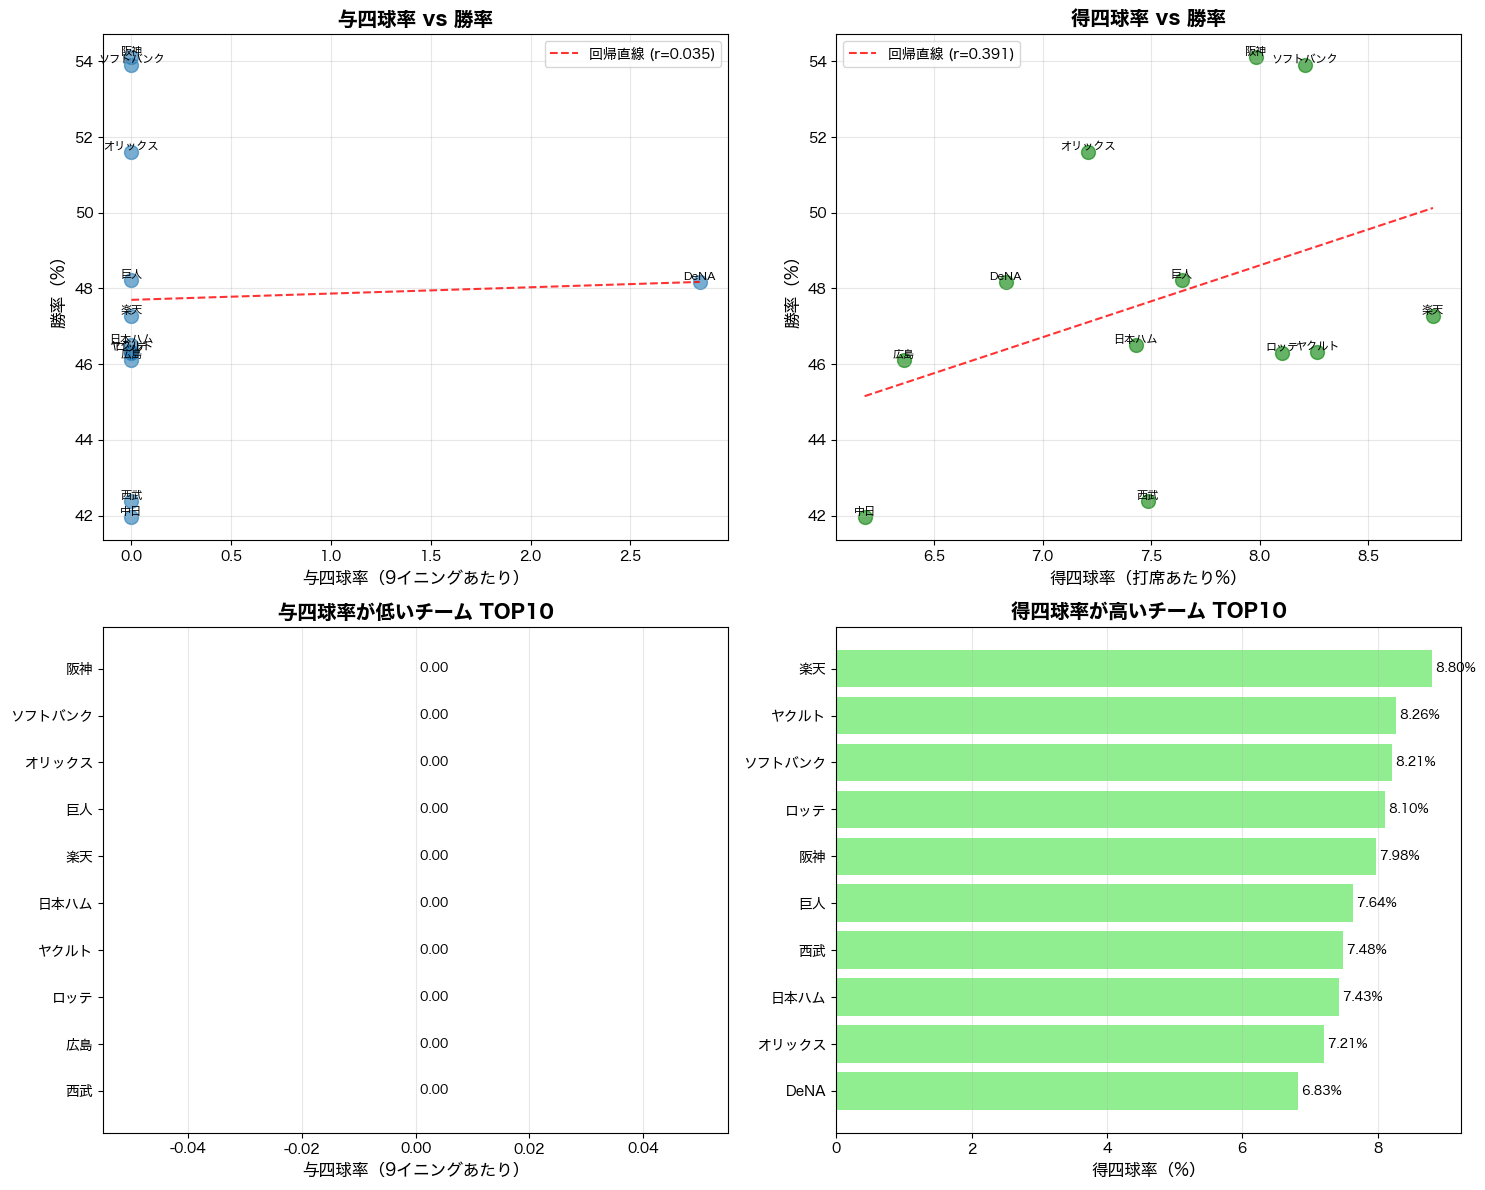


分析結果を 'team_analysis_result.csv' として保存しました

分析完了！


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォント設定（環境に応じて調整）
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（エンコーディング自動判定）
print("データを読み込んでいます...")

def read_csv_auto_encoding(filename):
    """エンコーディングを自動判定してCSVを読み込む"""
    encodings = ['utf-8', 'shift-jis', 'cp932', 'utf-8-sig']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f"  {filename}: {encoding}で読み込み成功")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"  {filename}: エラー ({encoding}): {e}")
            continue
    
    raise ValueError(f"{filename}の読み込みに失敗しました")

games = read_csv_auto_encoding('games.csv')
stats_pit = read_csv_auto_encoding('stats_pit.csv')
stats_bat = read_csv_auto_encoding('stats_bat.csv')  # 任意：得四球率分析用

print(f"試合データ: {len(games)}試合")
print(f"投手データ: {len(stats_pit)}選手")
print(f"打撃データ: {len(stats_bat)}選手\n")

# 1. チーム別勝敗を集計
print("=== チーム別勝敗を集計 ===")
team_records = {}

for _, game in games.iterrows():
    home_team = game['home_team_name']
    away_team = game['away_team_name']
    home_score = game['home_team_score']
    away_score = game['away_team_score']
    
    # 初期化
    if home_team not in team_records:
        team_records[home_team] = {'wins': 0, 'losses': 0, 'games': 0}
    if away_team not in team_records:
        team_records[away_team] = {'wins': 0, 'losses': 0, 'games': 0}
    
    # 勝敗集計
    if home_score > away_score:
        team_records[home_team]['wins'] += 1
        team_records[away_team]['losses'] += 1
    elif away_score > home_score:
        team_records[away_team]['wins'] += 1
        team_records[home_team]['losses'] += 1
    
    team_records[home_team]['games'] += 1
    team_records[away_team]['games'] += 1

# 2. チーム別投手成績を集計（与四球率）
print("=== チーム別与四球率を計算 ===")
team_pitching = stats_pit.groupby('team_name').agg({
    'bb': 'sum',
    'ip': 'sum',
    'ip_frac': 'sum'
}).reset_index()

# 与四球率の計算: bb * 9 / (ip + ip_frac / 3)
team_pitching['total_ip'] = team_pitching['ip'] + team_pitching['ip_frac'] / 3
team_pitching['bb_rate'] = team_pitching['bb'] * 9 / team_pitching['total_ip']

# 3. チーム別打撃成績を集計（得四球率）
print("=== チーム別得四球率を計算 ===")
team_batting = stats_bat.groupby('team_name').agg({
    'bb': 'sum',
    'pa': 'sum'
}).reset_index()

# 得四球率の計算: bb / pa * 100
team_batting['bb_obp'] = team_batting['bb'] / team_batting['pa'] * 100

# 4. 統合データフレーム作成
print("=== 統合データを作成 ===")
analysis_data = []

for team, record in team_records.items():
    win_rate = (record['wins'] / record['games'] * 100) if record['games'] > 0 else 0
    
    # 投手成績
    pit_stats = team_pitching[team_pitching['team_name'] == team]
    bb_rate = pit_stats['bb_rate'].values[0] if len(pit_stats) > 0 else 0
    bb_count = pit_stats['bb'].values[0] if len(pit_stats) > 0 else 0
    total_ip = pit_stats['total_ip'].values[0] if len(pit_stats) > 0 else 0
    
    # 打撃成績
    bat_stats = team_batting[team_batting['team_name'] == team]
    bb_obp = bat_stats['bb_obp'].values[0] if len(bat_stats) > 0 else 0
    
    analysis_data.append({
        'team': team,
        'wins': record['wins'],
        'losses': record['losses'],
        'games': record['games'],
        'win_rate': win_rate,
        'bb_rate': bb_rate,
        'bb_obp': bb_obp,
        'bb_count': bb_count,
        'total_ip': total_ip
    })

df_analysis = pd.DataFrame(analysis_data).sort_values('win_rate', ascending=False)

# 5. 相関分析
print("\n=== 相関分析 ===")
correlation_bb = df_analysis['bb_rate'].corr(df_analysis['win_rate'])
correlation_obp = df_analysis['bb_obp'].corr(df_analysis['win_rate'])

print(f"与四球率と勝率の相関係数: {correlation_bb:.3f}")
print(f"得四球率と勝率の相関係数: {correlation_obp:.3f}\n")

if correlation_bb < -0.3:
    print("→ 負の相関：四球を与えないチームほど強い傾向")
elif correlation_bb > 0.3:
    print("→ 正の相関：四球を与えるチームほど強い傾向")
else:
    print("→ 相関は弱い")

if correlation_obp > 0.3:
    print("→ 正の相関：四球を選ぶチームほど強い傾向")
elif correlation_obp < -0.3:
    print("→ 負の相関")
else:
    print("→ 相関は弱い")

# 6. 結果表示
print("\n=== チーム別詳細データ ===")
display_df = df_analysis[['team', 'win_rate', 'wins', 'losses', 'bb_rate', 'bb_obp', 'bb_count', 'total_ip']].copy()
display_df.columns = ['チーム名', '勝率(%)', '勝', '敗', '与四球率', '得四球率(%)', '与四球数', '投球回']
display_df['勝率(%)'] = display_df['勝率(%)'].round(1)
display_df['与四球率'] = display_df['与四球率'].round(2)
display_df['得四球率(%)'] = display_df['得四球率(%)'].round(1)
display_df['投球回'] = display_df['投球回'].round(1)
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string())

# 7. 可視化
print("\n=== グラフを作成中 ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# グラフ1: 与四球率 vs 勝率（散布図）
ax1 = axes[0, 0]
ax1.scatter(df_analysis['bb_rate'], df_analysis['win_rate'], alpha=0.6, s=100)
for _, row in df_analysis.iterrows():
    ax1.annotate(row['team'], (row['bb_rate'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z = np.polyfit(df_analysis['bb_rate'], df_analysis['win_rate'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['bb_rate'].min(), df_analysis['bb_rate'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_bb:.3f})')

ax1.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax1.set_ylabel('勝率（%）', fontsize=12)
ax1.set_title('与四球率 vs 勝率', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# グラフ2: 得四球率 vs 勝率（散布図）
ax2 = axes[0, 1]
ax2.scatter(df_analysis['bb_obp'], df_analysis['win_rate'], alpha=0.6, s=100, color='green')
for _, row in df_analysis.iterrows():
    ax2.annotate(row['team'], (row['bb_obp'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z2 = np.polyfit(df_analysis['bb_obp'], df_analysis['win_rate'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_analysis['bb_obp'].min(), df_analysis['bb_obp'].max(), 100)
ax2.plot(x_line2, p2(x_line2), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_obp:.3f})')

ax2.set_xlabel('得四球率（打席あたり%）', fontsize=12)
ax2.set_ylabel('勝率（%）', fontsize=12)
ax2.set_title('得四球率 vs 勝率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# グラフ3: 与四球率ランキング
ax3 = axes[1, 0]
top10_bb = df_analysis.nsmallest(10, 'bb_rate')
bars3 = ax3.barh(range(len(top10_bb)), top10_bb['bb_rate'], color='skyblue')
ax3.set_yticks(range(len(top10_bb)))
ax3.set_yticklabels(top10_bb['team'])
ax3.invert_yaxis()
ax3.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax3.set_title('与四球率が低いチーム TOP10', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_bb.iterrows()):
    ax3.text(row['bb_rate'], i, f" {row['bb_rate']:.2f}", 
            va='center', fontsize=9)

# グラフ4: 得四球率ランキング
ax4 = axes[1, 1]
top10_obp = df_analysis.nlargest(10, 'bb_obp')
bars4 = ax4.barh(range(len(top10_obp)), top10_obp['bb_obp'], color='lightgreen')
ax4.set_yticks(range(len(top10_obp)))
ax4.set_yticklabels(top10_obp['team'])
ax4.invert_yaxis()
ax4.set_xlabel('得四球率（%）', fontsize=12)
ax4.set_title('得四球率が高いチーム TOP10', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_obp.iterrows()):
    ax4.text(row['bb_obp'], i, f" {row['bb_obp']:.2f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('bb_analysis_result.png', dpi=300, bbox_inches='tight')
print("グラフを 'bb_analysis_result.png' として保存しました")
plt.show()

# 8. CSVとして結果を保存
df_analysis.to_csv('team_analysis_result.csv', index=False, encoding='utf-8-sig')
print("\n分析結果を 'team_analysis_result.csv' として保存しました")

print("\n分析完了！")

データを読み込んでいます...
  games.csv: shift-jisで読み込み成功
  stats_pit.csv: shift-jisで読み込み成功
  stats_bat.csv: cp932で読み込み成功
試合データ: 4382試合
投手データ: 1749選手
打撃データ: 3522選手

=== チーム別勝敗を集計 ===
=== チーム別与四球率を計算 ===
投手データのカラム: ['season_year', 'team_league_id', 'team_league_name', 'team_id', 'team_name', 'player_id', 'player_name', 'g', 'gs', 'cg', 'gf', 'sho', 'qs', 'w', 'l', 'sv', 'hld', 'ip', 'ip_frac', 'bf', 'ab', 'h', 'h1b', 'h2b', 'h3b', 'hr', 'tb', 'bb', 'hbp', 'ibb', 'sh', 'sf', 'so', 'wp', 'bk', 'r', 'er', 'np']
サンプルデータ:
  team_name  bb  ip  ip_frac
0      ???l   0   2        1
1      ???l  37  78        1
2      ???l   6  16        1
3      ???l  22  63        0
4      ???l   7  18        1

チーム別投手成績（サンプル）:
  team_name    bb     ip  ip_frac      total_ip   bb_rate
0      ????  4407  12630      267  12719.000000  3.118406
1  ???N???g  1944   6322      126   6364.000000  2.749214
2    ???b?e  2053   6326      129   6369.000000  2.901083
3      ???l  2001   6331      120   6371.000000  2.826715
4  ???{?n

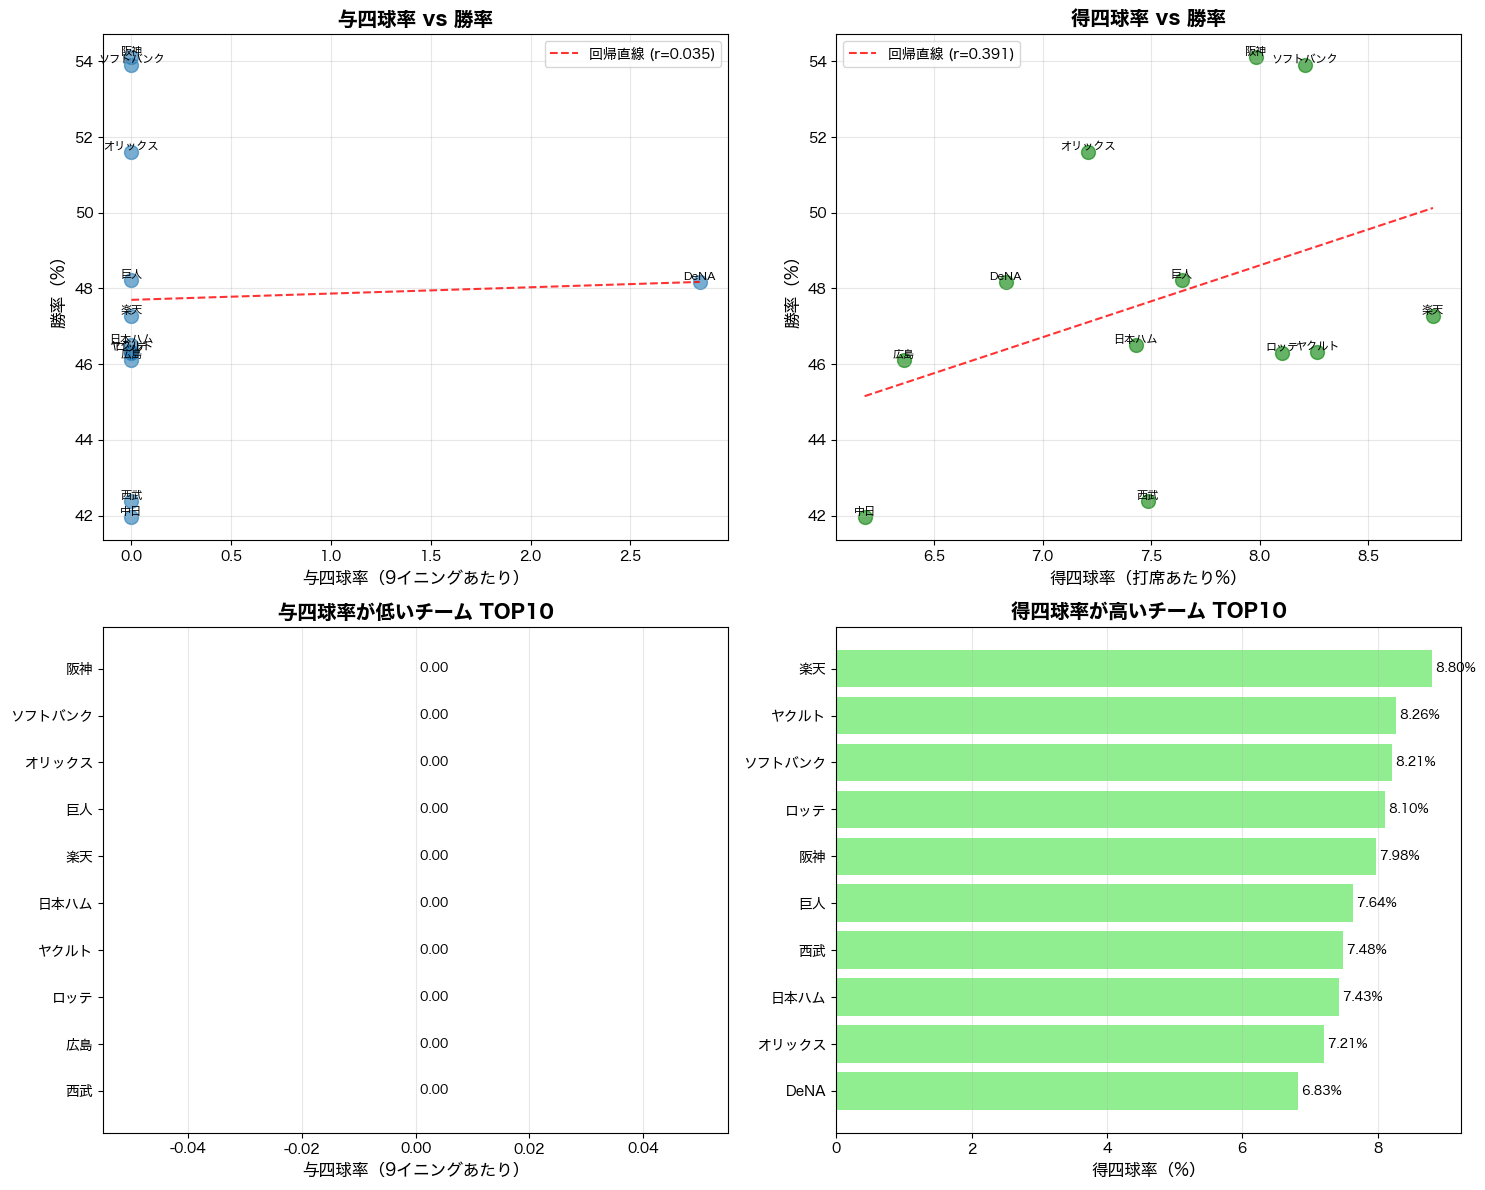


分析結果を 'team_analysis_result.csv' として保存しました

分析完了！


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォント設定（環境に応じて調整）
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（エンコーディング自動判定）
print("データを読み込んでいます...")

def read_csv_auto_encoding(filename):
    """エンコーディングを自動判定してCSVを読み込む"""
    encodings = ['utf-8', 'shift-jis', 'cp932', 'utf-8-sig']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f"  {filename}: {encoding}で読み込み成功")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"  {filename}: エラー ({encoding}): {e}")
            continue
    
    raise ValueError(f"{filename}の読み込みに失敗しました")

games = read_csv_auto_encoding('games.csv')
stats_pit = read_csv_auto_encoding('stats_pit.csv')
stats_bat = read_csv_auto_encoding('stats_bat.csv')  # 任意：得四球率分析用

print(f"試合データ: {len(games)}試合")
print(f"投手データ: {len(stats_pit)}選手")
print(f"打撃データ: {len(stats_bat)}選手\n")

# 1. チーム別勝敗を集計
print("=== チーム別勝敗を集計 ===")
team_records = {}

for _, game in games.iterrows():
    home_team = game['home_team_name']
    away_team = game['away_team_name']
    home_score = game['home_team_score']
    away_score = game['away_team_score']
    
    # 初期化
    if home_team not in team_records:
        team_records[home_team] = {'wins': 0, 'losses': 0, 'games': 0}
    if away_team not in team_records:
        team_records[away_team] = {'wins': 0, 'losses': 0, 'games': 0}
    
    # 勝敗集計
    if home_score > away_score:
        team_records[home_team]['wins'] += 1
        team_records[away_team]['losses'] += 1
    elif away_score > home_score:
        team_records[away_team]['wins'] += 1
        team_records[home_team]['losses'] += 1
    
    team_records[home_team]['games'] += 1
    team_records[away_team]['games'] += 1

# 2. チーム別投手成績を集計（与四球率）
print("=== チーム別与四球率を計算 ===")

# データ型の確認と変換
print("投手データのカラム:", stats_pit.columns.tolist())
print("サンプルデータ:")
print(stats_pit[['team_name', 'bb', 'ip', 'ip_frac']].head())

# 数値型に変換（文字列の場合に対応）
stats_pit['bb'] = pd.to_numeric(stats_pit['bb'], errors='coerce').fillna(0)
stats_pit['ip'] = pd.to_numeric(stats_pit['ip'], errors='coerce').fillna(0)
stats_pit['ip_frac'] = pd.to_numeric(stats_pit['ip_frac'], errors='coerce').fillna(0)

team_pitching = stats_pit.groupby('team_name').agg({
    'bb': 'sum',
    'ip': 'sum',
    'ip_frac': 'sum'
}).reset_index()

# 与四球率の計算: bb * 9 / (ip + ip_frac / 3)
team_pitching['total_ip'] = team_pitching['ip'] + team_pitching['ip_frac'] / 3
team_pitching['bb_rate'] = team_pitching.apply(
    lambda row: (row['bb'] * 9 / row['total_ip']) if row['total_ip'] > 0 else 0, 
    axis=1
)

print("\nチーム別投手成績（サンプル）:")
print(team_pitching[['team_name', 'bb', 'ip', 'ip_frac', 'total_ip', 'bb_rate']].head())

# 3. チーム別打撃成績を集計（得四球率）
print("\n=== チーム別得四球率を計算 ===")

# データ型の確認と変換
stats_bat['bb'] = pd.to_numeric(stats_bat['bb'], errors='coerce').fillna(0)
stats_bat['pa'] = pd.to_numeric(stats_bat['pa'], errors='coerce').fillna(0)

team_batting = stats_bat.groupby('team_name').agg({
    'bb': 'sum',
    'pa': 'sum'
}).reset_index()

# 得四球率の計算: bb / pa * 100
team_batting['bb_obp'] = team_batting.apply(
    lambda row: (row['bb'] / row['pa'] * 100) if row['pa'] > 0 else 0,
    axis=1
)

print("チーム別打撃成績（サンプル）:")
print(team_batting[['team_name', 'bb', 'pa', 'bb_obp']].head())

# 4. 統合データフレーム作成
print("=== 統合データを作成 ===")
analysis_data = []

for team, record in team_records.items():
    win_rate = (record['wins'] / record['games'] * 100) if record['games'] > 0 else 0
    
    # 投手成績
    pit_stats = team_pitching[team_pitching['team_name'] == team]
    bb_rate = pit_stats['bb_rate'].values[0] if len(pit_stats) > 0 else 0
    bb_count = pit_stats['bb'].values[0] if len(pit_stats) > 0 else 0
    total_ip = pit_stats['total_ip'].values[0] if len(pit_stats) > 0 else 0
    
    # 打撃成績
    bat_stats = team_batting[team_batting['team_name'] == team]
    bb_obp = bat_stats['bb_obp'].values[0] if len(bat_stats) > 0 else 0
    
    analysis_data.append({
        'team': team,
        'wins': record['wins'],
        'losses': record['losses'],
        'games': record['games'],
        'win_rate': win_rate,
        'bb_rate': bb_rate,
        'bb_obp': bb_obp,
        'bb_count': bb_count,
        'total_ip': total_ip
    })

df_analysis = pd.DataFrame(analysis_data).sort_values('win_rate', ascending=False)

# 5. 相関分析
print("\n=== 相関分析 ===")
correlation_bb = df_analysis['bb_rate'].corr(df_analysis['win_rate'])
correlation_obp = df_analysis['bb_obp'].corr(df_analysis['win_rate'])

print(f"与四球率と勝率の相関係数: {correlation_bb:.3f}")
print(f"得四球率と勝率の相関係数: {correlation_obp:.3f}\n")

if correlation_bb < -0.3:
    print("→ 負の相関：四球を与えないチームほど強い傾向")
elif correlation_bb > 0.3:
    print("→ 正の相関：四球を与えるチームほど強い傾向")
else:
    print("→ 相関は弱い")

if correlation_obp > 0.3:
    print("→ 正の相関：四球を選ぶチームほど強い傾向")
elif correlation_obp < -0.3:
    print("→ 負の相関")
else:
    print("→ 相関は弱い")

# 6. 結果表示
print("\n=== チーム別詳細データ ===")
display_df = df_analysis[['team', 'win_rate', 'wins', 'losses', 'bb_rate', 'bb_obp', 'bb_count', 'total_ip']].copy()
display_df.columns = ['チーム名', '勝率(%)', '勝', '敗', '与四球率', '得四球率(%)', '与四球数', '投球回']
display_df['勝率(%)'] = display_df['勝率(%)'].round(1)
display_df['与四球率'] = display_df['与四球率'].round(2)
display_df['得四球率(%)'] = display_df['得四球率(%)'].round(1)
display_df['投球回'] = display_df['投球回'].round(1)
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string())

# 7. 可視化
print("\n=== グラフを作成中 ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# グラフ1: 与四球率 vs 勝率（散布図）
ax1 = axes[0, 0]
ax1.scatter(df_analysis['bb_rate'], df_analysis['win_rate'], alpha=0.6, s=100)
for _, row in df_analysis.iterrows():
    ax1.annotate(row['team'], (row['bb_rate'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z = np.polyfit(df_analysis['bb_rate'], df_analysis['win_rate'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['bb_rate'].min(), df_analysis['bb_rate'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_bb:.3f})')

ax1.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax1.set_ylabel('勝率（%）', fontsize=12)
ax1.set_title('与四球率 vs 勝率', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# グラフ2: 得四球率 vs 勝率（散布図）
ax2 = axes[0, 1]
ax2.scatter(df_analysis['bb_obp'], df_analysis['win_rate'], alpha=0.6, s=100, color='green')
for _, row in df_analysis.iterrows():
    ax2.annotate(row['team'], (row['bb_obp'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z2 = np.polyfit(df_analysis['bb_obp'], df_analysis['win_rate'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_analysis['bb_obp'].min(), df_analysis['bb_obp'].max(), 100)
ax2.plot(x_line2, p2(x_line2), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_obp:.3f})')

ax2.set_xlabel('得四球率（打席あたり%）', fontsize=12)
ax2.set_ylabel('勝率（%）', fontsize=12)
ax2.set_title('得四球率 vs 勝率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# グラフ3: 与四球率ランキング
ax3 = axes[1, 0]
top10_bb = df_analysis.nsmallest(10, 'bb_rate')
bars3 = ax3.barh(range(len(top10_bb)), top10_bb['bb_rate'], color='skyblue')
ax3.set_yticks(range(len(top10_bb)))
ax3.set_yticklabels(top10_bb['team'])
ax3.invert_yaxis()
ax3.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax3.set_title('与四球率が低いチーム TOP10', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_bb.iterrows()):
    ax3.text(row['bb_rate'], i, f" {row['bb_rate']:.2f}", 
            va='center', fontsize=9)

# グラフ4: 得四球率ランキング
ax4 = axes[1, 1]
top10_obp = df_analysis.nlargest(10, 'bb_obp')
bars4 = ax4.barh(range(len(top10_obp)), top10_obp['bb_obp'], color='lightgreen')
ax4.set_yticks(range(len(top10_obp)))
ax4.set_yticklabels(top10_obp['team'])
ax4.invert_yaxis()
ax4.set_xlabel('得四球率（%）', fontsize=12)
ax4.set_title('得四球率が高いチーム TOP10', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_obp.iterrows()):
    ax4.text(row['bb_obp'], i, f" {row['bb_obp']:.2f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('bb_analysis_result.png', dpi=300, bbox_inches='tight')
print("グラフを 'bb_analysis_result.png' として保存しました")
plt.show()

# 8. CSVとして結果を保存
df_analysis.to_csv('team_analysis_result.csv', index=False, encoding='utf-8-sig')
print("\n分析結果を 'team_analysis_result.csv' として保存しました")

print("\n分析完了！")

データを読み込んでいます...
  games.csv: shift-jisで読み込み成功
  stats_pit.csv: shift-jisで読み込み成功
  stats_bat.csv: cp932で読み込み成功
試合データ: 4382試合
投手データ: 1749選手
打撃データ: 3522選手

=== チーム別勝敗を集計 ===
=== チーム別与四球率を計算 ===
投手データのカラム: ['season_year', 'team_league_id', 'team_league_name', 'team_id', 'team_name', 'player_id', 'player_name', 'g', 'gs', 'cg', 'gf', 'sho', 'qs', 'w', 'l', 'sv', 'hld', 'ip', 'ip_frac', 'bf', 'ab', 'h', 'h1b', 'h2b', 'h3b', 'hr', 'tb', 'bb', 'hbp', 'ibb', 'sh', 'sf', 'so', 'wp', 'bk', 'r', 'er', 'np']
サンプルデータ:
  team_name  bb  ip  ip_frac
0      ???l   0   2        1
1      ???l  37  78        1
2      ???l   6  16        1
3      ???l  22  63        0
4      ???l   7  18        1

チーム別投手成績（サンプル）:
  team_name    bb     ip  ip_frac      total_ip   bb_rate
0      ????  4407  12630      267  12719.000000  3.118406
1  ???N???g  1944   6322      126   6364.000000  2.749214
2    ???b?e  2053   6326      129   6369.000000  2.901083
3      ???l  2001   6331      120   6371.000000  2.826715
4  ???{?n

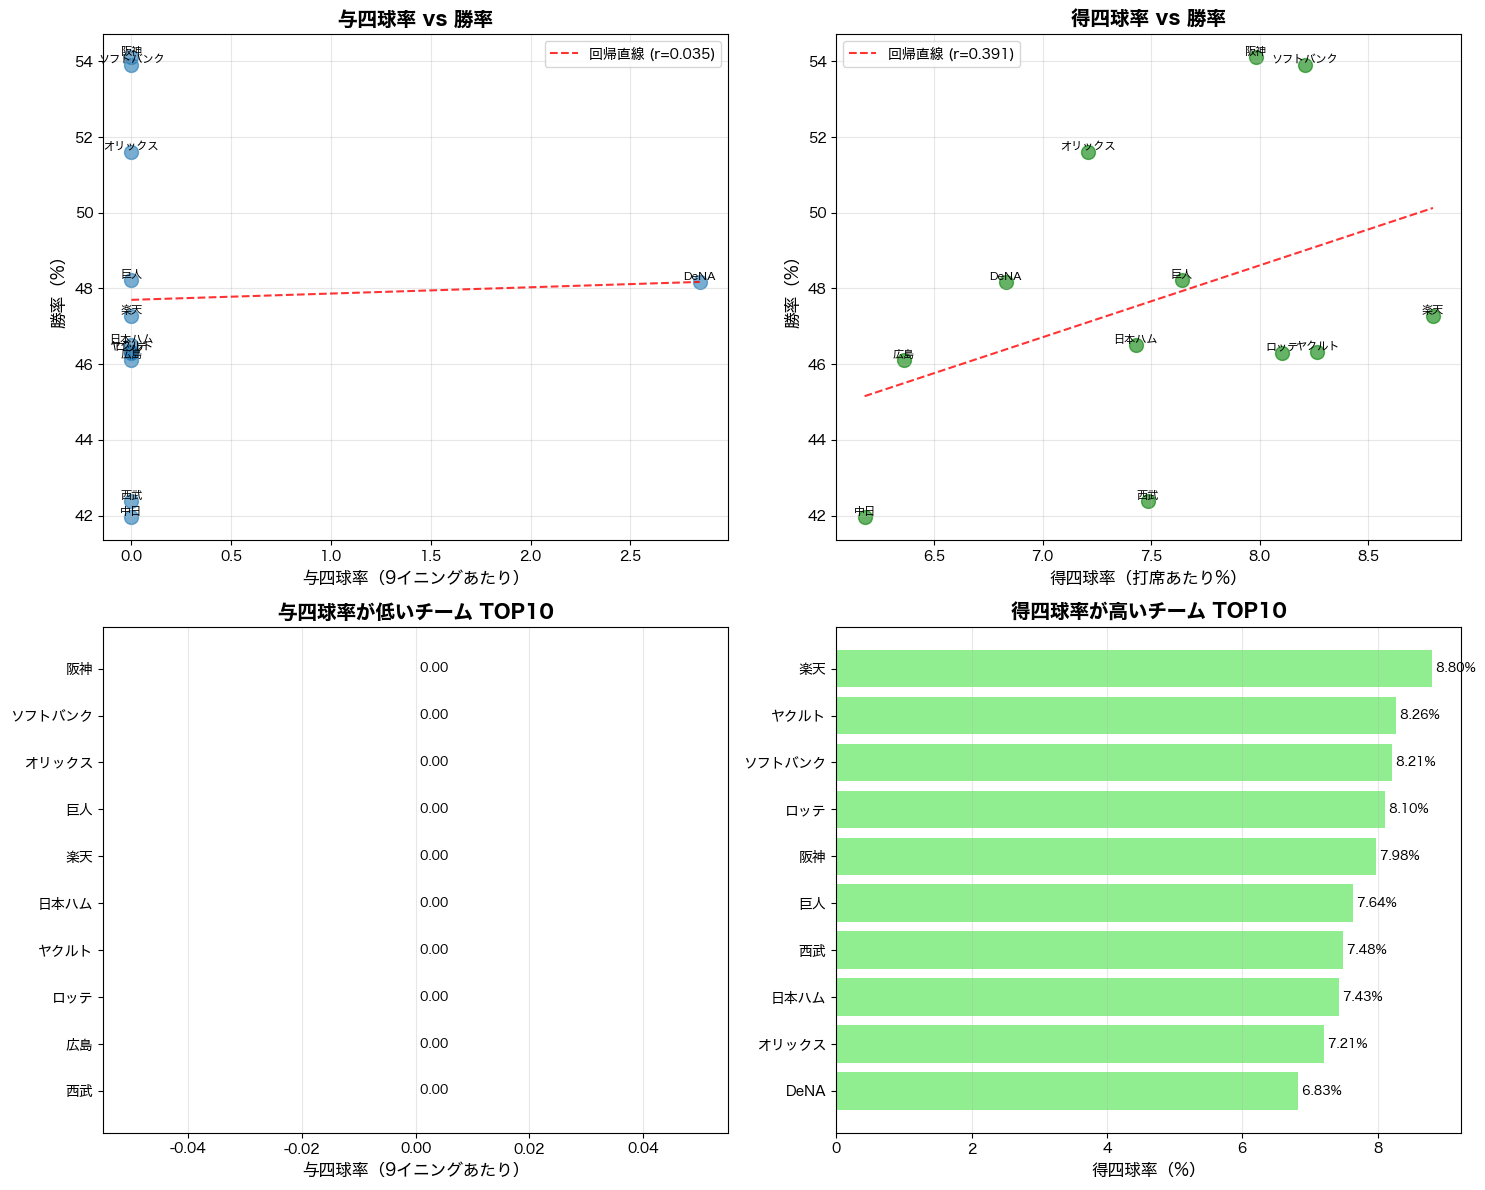


分析結果を 'team_analysis_result.csv' として保存しました

分析完了！


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォント設定（環境に応じて調整）
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（エンコーディング自動判定）
print("データを読み込んでいます...")

def read_csv_auto_encoding(filename):
    """エンコーディングを自動判定してCSVを読み込む"""
    encodings = ['utf-8', 'shift-jis', 'cp932', 'utf-8-sig']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f"  {filename}: {encoding}で読み込み成功")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"  {filename}: エラー ({encoding}): {e}")
            continue
    
    raise ValueError(f"{filename}の読み込みに失敗しました")

games = read_csv_auto_encoding('games.csv')
stats_pit = read_csv_auto_encoding('stats_pit.csv')
stats_bat = read_csv_auto_encoding('stats_bat.csv')  # 任意：得四球率分析用

print(f"試合データ: {len(games)}試合")
print(f"投手データ: {len(stats_pit)}選手")
print(f"打撃データ: {len(stats_bat)}選手\n")

# 1. チーム別勝敗を集計
print("=== チーム別勝敗を集計 ===")
team_records = {}

for _, game in games.iterrows():
    home_team = game['home_team_name']
    away_team = game['away_team_name']
    home_score = game['home_team_score']
    away_score = game['away_team_score']
    
    # 初期化
    if home_team not in team_records:
        team_records[home_team] = {'wins': 0, 'losses': 0, 'games': 0}
    if away_team not in team_records:
        team_records[away_team] = {'wins': 0, 'losses': 0, 'games': 0}
    
    # 勝敗集計
    if home_score > away_score:
        team_records[home_team]['wins'] += 1
        team_records[away_team]['losses'] += 1
    elif away_score > home_score:
        team_records[away_team]['wins'] += 1
        team_records[home_team]['losses'] += 1
    
    team_records[home_team]['games'] += 1
    team_records[away_team]['games'] += 1

# 2. チーム別投手成績を集計（与四球率）
print("=== チーム別与四球率を計算 ===")

# データ型の確認と変換
print("投手データのカラム:", stats_pit.columns.tolist())
print("サンプルデータ:")
print(stats_pit[['team_name', 'bb', 'ip', 'ip_frac']].head())

# 数値型に変換（文字列の場合に対応）
stats_pit['bb'] = pd.to_numeric(stats_pit['bb'], errors='coerce').fillna(0)
stats_pit['ip'] = pd.to_numeric(stats_pit['ip'], errors='coerce').fillna(0)
stats_pit['ip_frac'] = pd.to_numeric(stats_pit['ip_frac'], errors='coerce').fillna(0)

team_pitching = stats_pit.groupby('team_name').agg({
    'bb': 'sum',
    'ip': 'sum',
    'ip_frac': 'sum'
}).reset_index()

# 与四球率の計算: bb * 9 / (ip + ip_frac / 3)
team_pitching['total_ip'] = team_pitching['ip'] + team_pitching['ip_frac'] / 3
team_pitching['bb_rate'] = team_pitching.apply(
    lambda row: (row['bb'] * 9 / row['total_ip']) if row['total_ip'] > 0 else 0, 
    axis=1
)

print("\nチーム別投手成績（サンプル）:")
print(team_pitching[['team_name', 'bb', 'ip', 'ip_frac', 'total_ip', 'bb_rate']].head())

# 3. チーム別打撃成績を集計（得四球率）
print("\n=== チーム別得四球率を計算 ===")

# データ型の確認と変換
stats_bat['bb'] = pd.to_numeric(stats_bat['bb'], errors='coerce').fillna(0)
stats_bat['pa'] = pd.to_numeric(stats_bat['pa'], errors='coerce').fillna(0)

team_batting = stats_bat.groupby('team_name').agg({
    'bb': 'sum',
    'pa': 'sum'
}).reset_index()

# 得四球率の計算: bb / pa * 100
team_batting['bb_obp'] = team_batting.apply(
    lambda row: (row['bb'] / row['pa'] * 100) if row['pa'] > 0 else 0,
    axis=1
)

print("チーム別打撃成績（サンプル）:")
print(team_batting[['team_name', 'bb', 'pa', 'bb_obp']].head())

# 4. 統合データフレーム作成
print("\n=== 統合データを作成 ===")

# チーム名のマッピング確認
print("試合データのチーム名（ユニーク）:")
unique_teams_games = set(games['home_team_name'].unique()) | set(games['away_team_name'].unique())
print(sorted(unique_teams_games))

print("\n投手データのチーム名（ユニーク）:")
print(sorted(team_pitching['team_name'].unique()))

print("\n打撃データのチーム名（ユニーク）:")
print(sorted(team_batting['team_name'].unique()))

analysis_data = []

for team, record in team_records.items():
    win_rate = (record['wins'] / record['games'] * 100) if record['games'] > 0 else 0
    
    # 投手成績（チーム名で結合）
    pit_stats = team_pitching[team_pitching['team_name'] == team]
    if len(pit_stats) > 0:
        bb_rate = pit_stats['bb_rate'].values[0]
        bb_count = pit_stats['bb'].values[0]
        total_ip = pit_stats['total_ip'].values[0]
    else:
        print(f"警告: {team} の投手データが見つかりません")
        bb_rate = 0
        bb_count = 0
        total_ip = 0
    
    # 打撃成績（チーム名で結合）
    bat_stats = team_batting[team_batting['team_name'] == team]
    if len(bat_stats) > 0:
        bb_obp = bat_stats['bb_obp'].values[0]
    else:
        print(f"警告: {team} の打撃データが見つかりません")
        bb_obp = 0
    
    analysis_data.append({
        'team': team,
        'wins': record['wins'],
        'losses': record['losses'],
        'games': record['games'],
        'win_rate': win_rate,
        'bb_rate': bb_rate,
        'bb_obp': bb_obp,
        'bb_count': bb_count,
        'total_ip': total_ip
    })

df_analysis = pd.DataFrame(analysis_data).sort_values('win_rate', ascending=False)

print("\n統合後のデータ（与四球率が0でないチーム）:")
print(df_analysis[df_analysis['bb_rate'] > 0][['team', 'win_rate', 'bb_rate', 'bb_obp']])

# 5. 相関分析
print("\n=== 相関分析 ===")
correlation_bb = df_analysis['bb_rate'].corr(df_analysis['win_rate'])
correlation_obp = df_analysis['bb_obp'].corr(df_analysis['win_rate'])

print(f"与四球率と勝率の相関係数: {correlation_bb:.3f}")
print(f"得四球率と勝率の相関係数: {correlation_obp:.3f}\n")

if correlation_bb < -0.3:
    print("→ 負の相関：四球を与えないチームほど強い傾向")
elif correlation_bb > 0.3:
    print("→ 正の相関：四球を与えるチームほど強い傾向")
else:
    print("→ 相関は弱い")

if correlation_obp > 0.3:
    print("→ 正の相関：四球を選ぶチームほど強い傾向")
elif correlation_obp < -0.3:
    print("→ 負の相関")
else:
    print("→ 相関は弱い")

# 6. 結果表示
print("\n=== チーム別詳細データ ===")
display_df = df_analysis[['team', 'win_rate', 'wins', 'losses', 'bb_rate', 'bb_obp', 'bb_count', 'total_ip']].copy()
display_df.columns = ['チーム名', '勝率(%)', '勝', '敗', '与四球率', '得四球率(%)', '与四球数', '投球回']
display_df['勝率(%)'] = display_df['勝率(%)'].round(1)
display_df['与四球率'] = display_df['与四球率'].round(2)
display_df['得四球率(%)'] = display_df['得四球率(%)'].round(1)
display_df['投球回'] = display_df['投球回'].round(1)
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string())

# 7. 可視化
print("\n=== グラフを作成中 ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# グラフ1: 与四球率 vs 勝率（散布図）
ax1 = axes[0, 0]
ax1.scatter(df_analysis['bb_rate'], df_analysis['win_rate'], alpha=0.6, s=100)
for _, row in df_analysis.iterrows():
    ax1.annotate(row['team'], (row['bb_rate'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z = np.polyfit(df_analysis['bb_rate'], df_analysis['win_rate'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['bb_rate'].min(), df_analysis['bb_rate'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_bb:.3f})')

ax1.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax1.set_ylabel('勝率（%）', fontsize=12)
ax1.set_title('与四球率 vs 勝率', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# グラフ2: 得四球率 vs 勝率（散布図）
ax2 = axes[0, 1]
ax2.scatter(df_analysis['bb_obp'], df_analysis['win_rate'], alpha=0.6, s=100, color='green')
for _, row in df_analysis.iterrows():
    ax2.annotate(row['team'], (row['bb_obp'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
z2 = np.polyfit(df_analysis['bb_obp'], df_analysis['win_rate'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_analysis['bb_obp'].min(), df_analysis['bb_obp'].max(), 100)
ax2.plot(x_line2, p2(x_line2), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_obp:.3f})')

ax2.set_xlabel('得四球率（打席あたり%）', fontsize=12)
ax2.set_ylabel('勝率（%）', fontsize=12)
ax2.set_title('得四球率 vs 勝率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# グラフ3: 与四球率ランキング
ax3 = axes[1, 0]
top10_bb = df_analysis.nsmallest(10, 'bb_rate')
bars3 = ax3.barh(range(len(top10_bb)), top10_bb['bb_rate'], color='skyblue')
ax3.set_yticks(range(len(top10_bb)))
ax3.set_yticklabels(top10_bb['team'])
ax3.invert_yaxis()
ax3.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax3.set_title('与四球率が低いチーム TOP10', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_bb.iterrows()):
    ax3.text(row['bb_rate'], i, f" {row['bb_rate']:.2f}", 
            va='center', fontsize=9)

# グラフ4: 得四球率ランキング
ax4 = axes[1, 1]
top10_obp = df_analysis.nlargest(10, 'bb_obp')
bars4 = ax4.barh(range(len(top10_obp)), top10_obp['bb_obp'], color='lightgreen')
ax4.set_yticks(range(len(top10_obp)))
ax4.set_yticklabels(top10_obp['team'])
ax4.invert_yaxis()
ax4.set_xlabel('得四球率（%）', fontsize=12)
ax4.set_title('得四球率が高いチーム TOP10', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_obp.iterrows()):
    ax4.text(row['bb_obp'], i, f" {row['bb_obp']:.2f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('bb_analysis_result.png', dpi=300, bbox_inches='tight')
print("グラフを 'bb_analysis_result.png' として保存しました")
plt.show()

# 8. CSVとして結果を保存
df_analysis.to_csv('team_analysis_result.csv', index=False, encoding='utf-8-sig')
print("\n分析結果を 'team_analysis_result.csv' として保存しました")

print("\n分析完了！")

データを読み込んでいます...
  games.csv: shift-jisで読み込み成功
  stats_pit.csv: shift-jisで読み込み成功
  stats_bat.csv: cp932で読み込み成功
試合データ: 4382試合
投手データ: 1749選手
打撃データ: 3522選手

=== チーム別勝敗を集計 ===
=== チーム別与四球率を計算 ===
投手データのカラム: ['season_year', 'team_league_id', 'team_league_name', 'team_id', 'team_name', 'player_id', 'player_name', 'g', 'gs', 'cg', 'gf', 'sho', 'qs', 'w', 'l', 'sv', 'hld', 'ip', 'ip_frac', 'bf', 'ab', 'h', 'h1b', 'h2b', 'h3b', 'hr', 'tb', 'bb', 'hbp', 'ibb', 'sh', 'sf', 'so', 'wp', 'bk', 'r', 'er', 'np']

チーム別投手成績（サンプル）:
   team_id    bb    ip  ip_frac     total_ip   bb_rate
0        1  2001  6331      120  6371.000000  2.826715
1        2  1944  6322      126  6364.000000  2.749214
2        3  2017  6332      129  6375.000000  2.847529
3        4  2005  6324      131  6367.666667  2.833848
4        5  1617  6370      134  6414.666667  2.268707

=== チーム別得四球率を計算 ===
チーム別打撃成績（サンプル）:
   team_id    bb     pa    bb_obp
0        1  2036  26648  7.640348
1        2  2221  26877  8.263571
2        3  1

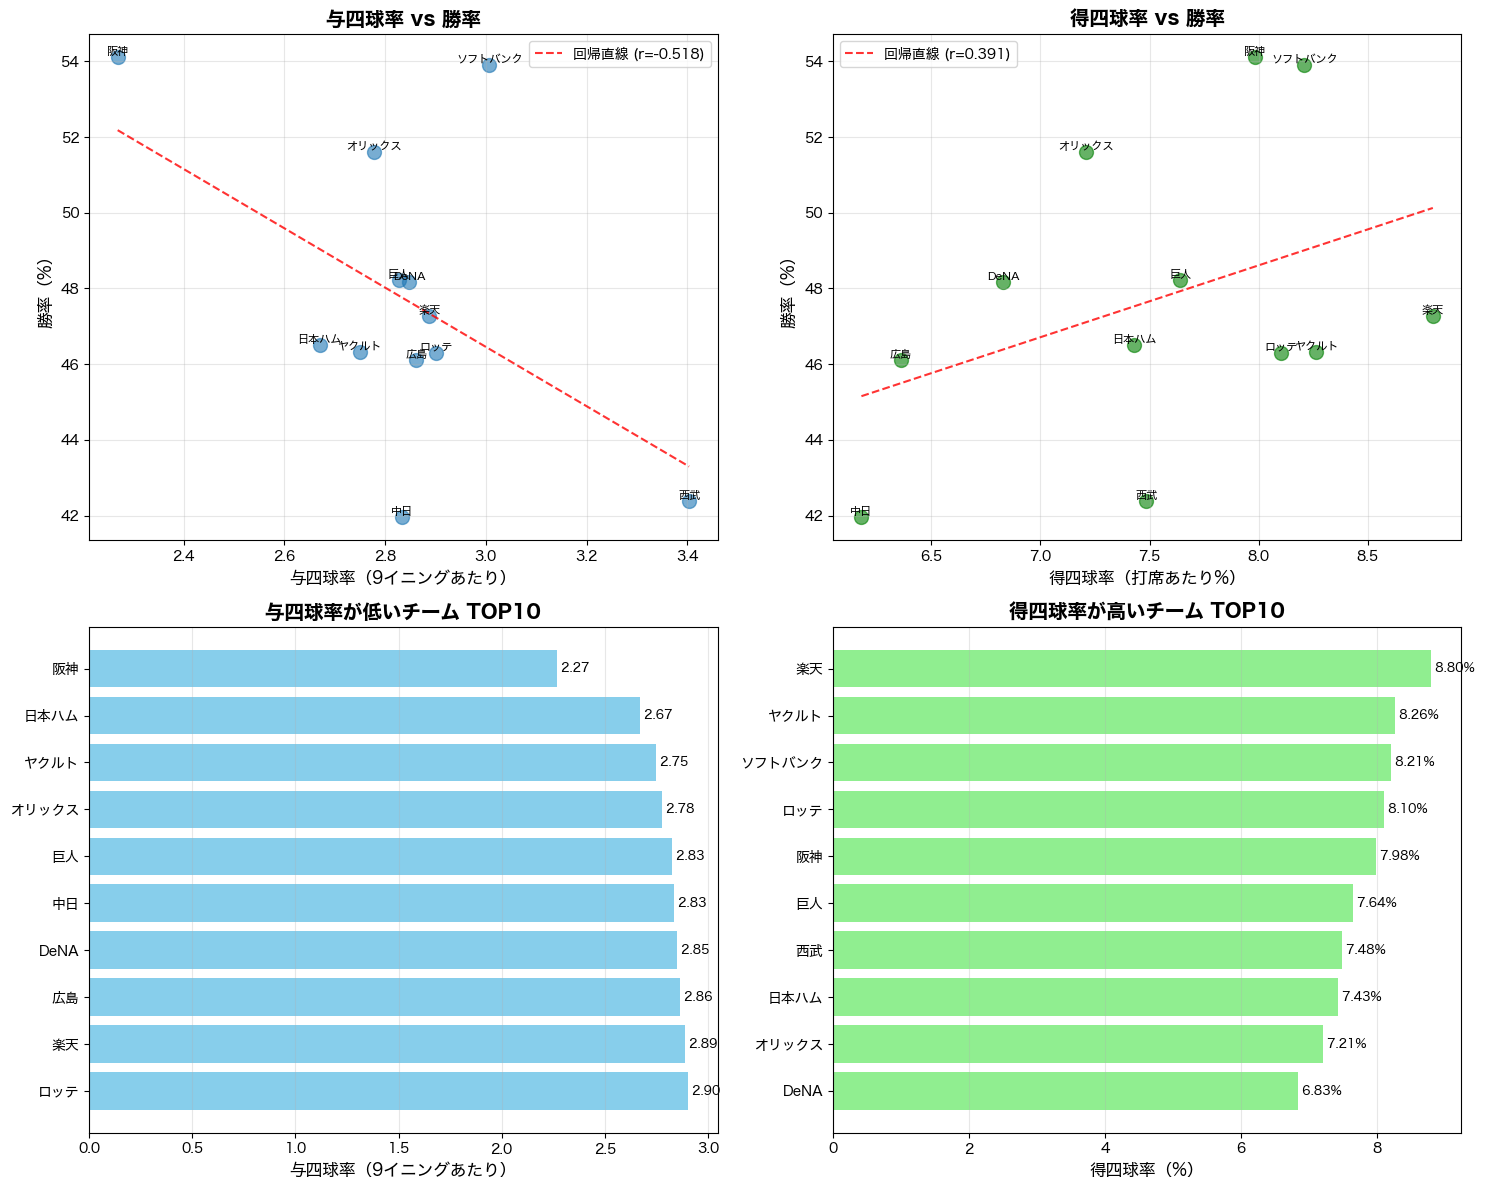


分析結果を 'team_analysis_result.csv' として保存しました

分析完了！


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォント設定（環境に応じて調整）
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（エンコーディング自動判定）
print("データを読み込んでいます...")

def read_csv_auto_encoding(filename):
    """エンコーディングを自動判定してCSVを読み込む"""
    encodings = ['utf-8', 'shift-jis', 'cp932', 'utf-8-sig']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f"  {filename}: {encoding}で読み込み成功")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"  {filename}: エラー ({encoding}): {e}")
            continue
    
    raise ValueError(f"{filename}の読み込みに失敗しました")

games = read_csv_auto_encoding('games.csv')
stats_pit = read_csv_auto_encoding('stats_pit.csv')
stats_bat = read_csv_auto_encoding('stats_bat.csv')  # 任意：得四球率分析用

print(f"試合データ: {len(games)}試合")
print(f"投手データ: {len(stats_pit)}選手")
print(f"打撃データ: {len(stats_bat)}選手\n")

# 1. チーム別勝敗を集計
print("=== チーム別勝敗を集計 ===")
team_records = {}

for _, game in games.iterrows():
    home_team_id = game['home_team_id']
    home_team_name = game['home_team_name']
    away_team_id = game['away_team_id']
    away_team_name = game['away_team_name']
    home_score = game['home_team_score']
    away_score = game['away_team_score']
    
    # 初期化（team_idをキーにする）
    if home_team_id not in team_records:
        team_records[home_team_id] = {
            'name': home_team_name,
            'wins': 0, 
            'losses': 0, 
            'games': 0
        }
    if away_team_id not in team_records:
        team_records[away_team_id] = {
            'name': away_team_name,
            'wins': 0, 
            'losses': 0, 
            'games': 0
        }
    
    # 勝敗集計
    if home_score > away_score:
        team_records[home_team_id]['wins'] += 1
        team_records[away_team_id]['losses'] += 1
    elif away_score > home_score:
        team_records[away_team_id]['wins'] += 1
        team_records[home_team_id]['losses'] += 1
    
    team_records[home_team_id]['games'] += 1
    team_records[away_team_id]['games'] += 1

# 2. チーム別投手成績を集計（与四球率）
print("=== チーム別与四球率を計算 ===")

# データ型の確認と変換
print("投手データのカラム:", stats_pit.columns.tolist())

# 数値型に変換（文字列の場合に対応）
stats_pit['bb'] = pd.to_numeric(stats_pit['bb'], errors='coerce').fillna(0)
stats_pit['ip'] = pd.to_numeric(stats_pit['ip'], errors='coerce').fillna(0)
stats_pit['ip_frac'] = pd.to_numeric(stats_pit['ip_frac'], errors='coerce').fillna(0)

# team_idでグループ化
team_pitching = stats_pit.groupby('team_id').agg({
    'bb': 'sum',
    'ip': 'sum',
    'ip_frac': 'sum'
}).reset_index()

# 与四球率の計算: bb * 9 / (ip + ip_frac / 3)
team_pitching['total_ip'] = team_pitching['ip'] + team_pitching['ip_frac'] / 3
team_pitching['bb_rate'] = team_pitching.apply(
    lambda row: (row['bb'] * 9 / row['total_ip']) if row['total_ip'] > 0 else 0, 
    axis=1
)

print("\nチーム別投手成績（サンプル）:")
print(team_pitching[['team_id', 'bb', 'ip', 'ip_frac', 'total_ip', 'bb_rate']].head())

# 3. チーム別打撃成績を集計（得四球率）
print("\n=== チーム別得四球率を計算 ===")

# データ型の確認と変換
stats_bat['bb'] = pd.to_numeric(stats_bat['bb'], errors='coerce').fillna(0)
stats_bat['pa'] = pd.to_numeric(stats_bat['pa'], errors='coerce').fillna(0)

# team_idでグループ化
team_batting = stats_bat.groupby('team_id').agg({
    'bb': 'sum',
    'pa': 'sum'
}).reset_index()

# 得四球率の計算: bb / pa * 100
team_batting['bb_obp'] = team_batting.apply(
    lambda row: (row['bb'] / row['pa'] * 100) if row['pa'] > 0 else 0,
    axis=1
)

print("チーム別打撃成績（サンプル）:")
print(team_batting[['team_id', 'bb', 'pa', 'bb_obp']].head())

# 4. 統合データフレーム作成
print("\n=== 統合データを作成 ===")

analysis_data = []

for team_id, record in team_records.items():
    win_rate = (record['wins'] / record['games'] * 100) if record['games'] > 0 else 0
    
    # 投手成績（team_idで結合）
    pit_stats = team_pitching[team_pitching['team_id'] == team_id]
    if len(pit_stats) > 0:
        bb_rate = pit_stats['bb_rate'].values[0]
        bb_count = pit_stats['bb'].values[0]
        total_ip = pit_stats['total_ip'].values[0]
    else:
        print(f"警告: チームID {team_id} ({record['name']}) の投手データが見つかりません")
        bb_rate = 0
        bb_count = 0
        total_ip = 0
    
    # 打撃成績（team_idで結合）
    bat_stats = team_batting[team_batting['team_id'] == team_id]
    if len(bat_stats) > 0:
        bb_obp = bat_stats['bb_obp'].values[0]
    else:
        print(f"警告: チームID {team_id} ({record['name']}) の打撃データが見つかりません")
        bb_obp = 0
    
    analysis_data.append({
        'team': record['name'],
        'team_id': team_id,
        'wins': record['wins'],
        'losses': record['losses'],
        'games': record['games'],
        'win_rate': win_rate,
        'bb_rate': bb_rate,
        'bb_obp': bb_obp,
        'bb_count': bb_count,
        'total_ip': total_ip
    })

df_analysis = pd.DataFrame(analysis_data).sort_values('win_rate', ascending=False)

print("\n統合後のデータ（上位5チーム）:")
print(df_analysis[['team', 'win_rate', 'bb_rate', 'bb_obp']].head())

# 5. 相関分析
print("\n=== 相関分析 ===")

# NaNや無限大を除外
df_clean = df_analysis[
    (df_analysis['bb_rate'] > 0) & 
    (df_analysis['bb_obp'] > 0) &
    np.isfinite(df_analysis['bb_rate']) &
    np.isfinite(df_analysis['bb_obp']) &
    np.isfinite(df_analysis['win_rate'])
].copy()

print(f"有効なデータ数: {len(df_clean)}チーム")

if len(df_clean) > 2:
    correlation_bb = df_clean['bb_rate'].corr(df_clean['win_rate'])
    correlation_obp = df_clean['bb_obp'].corr(df_clean['win_rate'])
    
    print(f"与四球率と勝率の相関係数: {correlation_bb:.3f}")
    print(f"得四球率と勝率の相関係数: {correlation_obp:.3f}\n")
    
    if correlation_bb < -0.3:
        print("→ 負の相関：四球を与えないチームほど強い傾向")
    elif correlation_bb > 0.3:
        print("→ 正の相関：四球を与えるチームほど強い傾向")
    else:
        print("→ 相関は弱い")
    
    if correlation_obp > 0.3:
        print("→ 正の相関：四球を選ぶチームほど強い傾向")
    elif correlation_obp < -0.3:
        print("→ 負の相関")
    else:
        print("→ 相関は弱い")
else:
    print("警告: 有効なデータが不足しています")
    correlation_bb = 0
    correlation_obp = 0

# 6. 結果表示
print("\n=== チーム別詳細データ ===")
display_df = df_analysis[['team', 'win_rate', 'wins', 'losses', 'bb_rate', 'bb_obp', 'bb_count', 'total_ip']].copy()
display_df.columns = ['チーム名', '勝率(%)', '勝', '敗', '与四球率', '得四球率(%)', '与四球数', '投球回']
display_df['勝率(%)'] = display_df['勝率(%)'].round(1)
display_df['与四球率'] = display_df['与四球率'].round(2)
display_df['得四球率(%)'] = display_df['得四球率(%)'].round(1)
display_df['投球回'] = display_df['投球回'].round(1)
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string())

# 7. 可視化
print("\n=== グラフを作成中 ===")

# グラフ用にクリーンなデータを使用
df_plot = df_clean.copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# グラフ1: 与四球率 vs 勝率（散布図）
ax1 = axes[0, 0]
ax1.scatter(df_plot['bb_rate'], df_plot['win_rate'], alpha=0.6, s=100)
for _, row in df_plot.iterrows():
    ax1.annotate(row['team'], (row['bb_rate'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
if len(df_plot) > 2:
    try:
        z = np.polyfit(df_plot['bb_rate'], df_plot['win_rate'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df_plot['bb_rate'].min(), df_plot['bb_rate'].max(), 100)
        ax1.plot(x_line, p(x_line), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_bb:.3f})')
    except:
        pass

ax1.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax1.set_ylabel('勝率（%）', fontsize=12)
ax1.set_title('与四球率 vs 勝率', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# グラフ2: 得四球率 vs 勝率（散布図）
ax2 = axes[0, 1]
ax2.scatter(df_plot['bb_obp'], df_plot['win_rate'], alpha=0.6, s=100, color='green')
for _, row in df_plot.iterrows():
    ax2.annotate(row['team'], (row['bb_obp'], row['win_rate']), 
                fontsize=8, ha='center', va='bottom')

# 回帰直線
if len(df_plot) > 2:
    try:
        z2 = np.polyfit(df_plot['bb_obp'], df_plot['win_rate'], 1)
        p2 = np.poly1d(z2)
        x_line2 = np.linspace(df_plot['bb_obp'].min(), df_plot['bb_obp'].max(), 100)
        ax2.plot(x_line2, p2(x_line2), "r--", alpha=0.8, label=f'回帰直線 (r={correlation_obp:.3f})')
    except:
        pass

ax2.set_xlabel('得四球率（打席あたり%）', fontsize=12)
ax2.set_ylabel('勝率（%）', fontsize=12)
ax2.set_title('得四球率 vs 勝率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# グラフ3: 与四球率ランキング
ax3 = axes[1, 0]
top10_bb = df_plot.nsmallest(10, 'bb_rate')
bars3 = ax3.barh(range(len(top10_bb)), top10_bb['bb_rate'], color='skyblue')
ax3.set_yticks(range(len(top10_bb)))
ax3.set_yticklabels(top10_bb['team'])
ax3.invert_yaxis()
ax3.set_xlabel('与四球率（9イニングあたり）', fontsize=12)
ax3.set_title('与四球率が低いチーム TOP10', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_bb.iterrows()):
    ax3.text(row['bb_rate'], i, f" {row['bb_rate']:.2f}", 
            va='center', fontsize=9)

# グラフ4: 得四球率ランキング
ax4 = axes[1, 1]
top10_obp = df_plot.nlargest(10, 'bb_obp')
bars4 = ax4.barh(range(len(top10_obp)), top10_obp['bb_obp'], color='lightgreen')
ax4.set_yticks(range(len(top10_obp)))
ax4.set_yticklabels(top10_obp['team'])
ax4.invert_yaxis()
ax4.set_xlabel('得四球率（%）', fontsize=12)
ax4.set_title('得四球率が高いチーム TOP10', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# 棒の右側に数値を表示
for i, (idx, row) in enumerate(top10_obp.iterrows()):
    ax4.text(row['bb_obp'], i, f" {row['bb_obp']:.2f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('bb_analysis_result.png', dpi=300, bbox_inches='tight')
print("グラフを 'bb_analysis_result.png' として保存しました")
plt.show()

# 8. CSVとして結果を保存
df_analysis.to_csv('team_analysis_result.csv', index=False, encoding='utf-8-sig')
print("\n分析結果を 'team_analysis_result.csv' として保存しました")

print("\n分析完了！")